# Nibabel Basics Notebook
### *Learning how to load and view MRI scans*

## Import Libraries
We need nibabel for MRI files and matplotlib for plotting.

In [4]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Upload an MRI File (.nii.gz)
Upload any NIfTI file.

In [5]:
# from google.colab import files
# uploaded = files.upload()

## Load MRI File
Nibabel loads the 3D MRI volume as a NumPy array.

In [8]:
# file_path = list(uploaded.keys())[0]
file_path = 'example1.nii.gz'
mri = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (256, 242, 154)


## Visualize a Middle Slice
MRI is 3D. We view one slice at a time.

(np.float64(-0.5), np.float64(241.5), np.float64(255.5), np.float64(-0.5))

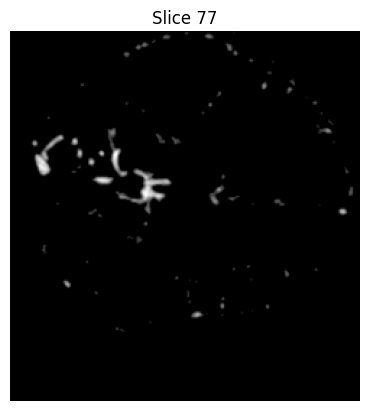

In [9]:
slice_index = mri.shape[2] // 2def plot_slices(volume, indices, axis=2):
    for i in indices:
        if axis == 0:
            sl = volume[i, :, :]
        elif axis == 1:
            sl = volume[:, i, :]
        else:
            sl = volume[:, :, i]
        plt.imshow(sl, cmap='gray')
        plt.title(f'Slice index {i} (axis={axis})')
        plt.axis('off')
        plt.show()

num_slices = mri.shape[2]
indices = np.linspace(0, num_slices-1, 5, dtype=int)
print('Visualizing slice indices:', indices.tolist())
plot_slices(mri, indices, axis=2)
plt.imshow(mri[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.axis('off')

## Extract All Slices
Convert 3D MRI into 2D slices.

In [10]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
len(slices)

154

## Normalize a Slice
Normalization improves contrast.

(np.float64(-0.5), np.float64(241.5), np.float64(255.5), np.float64(-0.5))

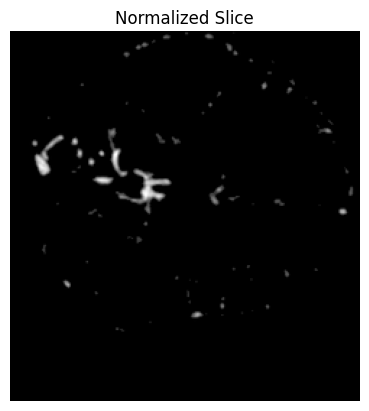

In [11]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.imshow(norm_slice, cmap='gray')
plt.title('Normalized Slice')
plt.axis('off')

## Resize Slice (Used in ML Preprocessing)

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

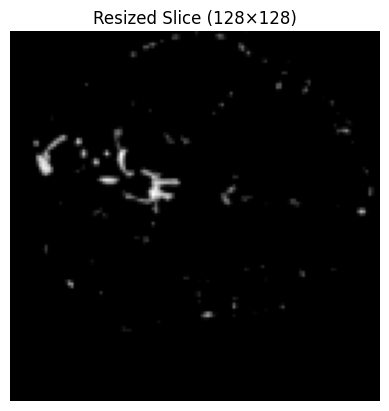

In [17]:
import tensorflow as tf
resized = tf.image.resize(norm_slice[..., None], (128, 128))
plt.imshow(resized.numpy().squeeze(), cmap='gray')
plt.title('Resized Slice (128×128)')
plt.axis('off')

## **Exercises**
1. Load **another** MRI file and visualize 5 slices.
2. Write a function `plot_slices(volume, indices)` to plot given slice numbers.
3. Create a function to normalize **all** slices and return the new array.


In [18]:
file_path = 'example2.nii.gz'
mri = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (255, 178, 256)


Visualizing slice indices: [0, 63, 127, 191, 255]


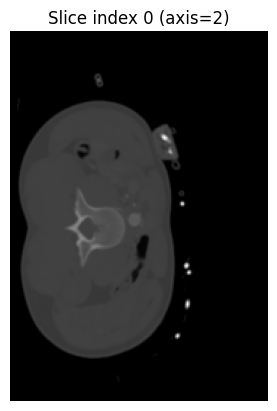

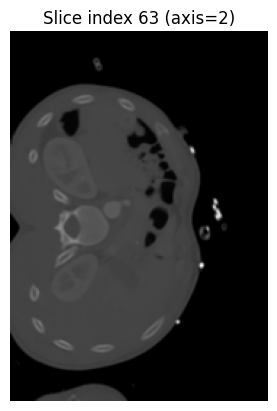

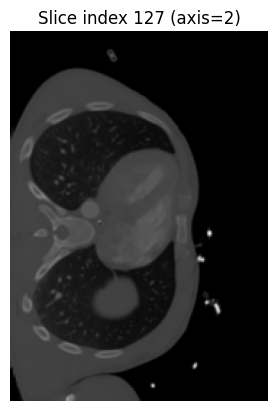

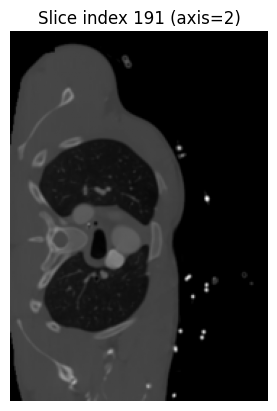

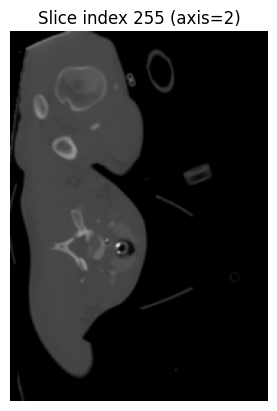

In [19]:
def plot_slices(volume, indices, axis=2):
    for i in indices:
        if axis == 0:
            sl = volume[i, :, :]
        elif axis == 1:
            sl = volume[:, i, :]
        else:
            sl = volume[:, :, i]
        plt.imshow(sl, cmap='gray')
        plt.title(f'Slice index {i} (axis={axis})')
        plt.axis('off')
        plt.show()

num_slices = mri.shape[2]
indices = np.linspace(0, num_slices-1, 5, dtype=int)
print('Visualizing slice indices:', indices.tolist())
plot_slices(mri, indices, axis=2)

After normalization: min = 0.0 , max = 1.0
Visualizing normalized slices:


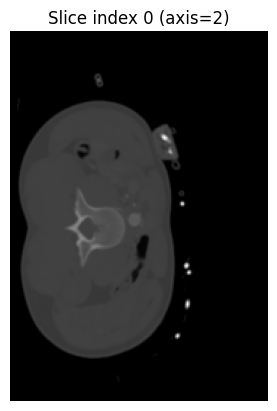

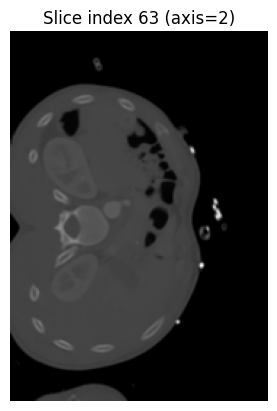

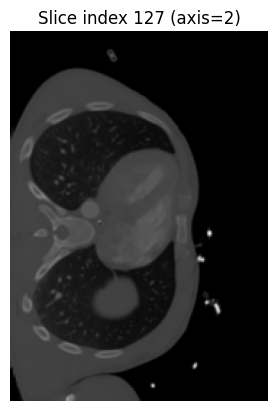

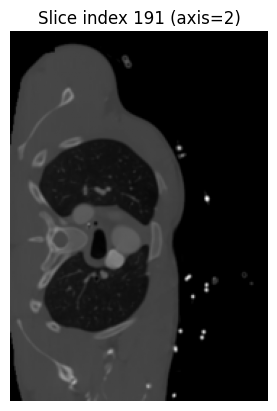

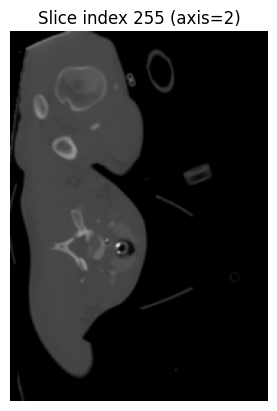

In [20]:
def normalize_all_slices(volume):
    vol = np.array(volume, dtype=np.float32, copy=True)
    mn = np.nanmin(vol)
    mx = np.nanmax(vol)
    if mx > mn:
        vol = (vol - mn) / (mx - mn)
    else:
        vol = np.zeros_like(vol)
    return vol

norm_mri = normalize_all_slices(mri)
print('After normalization: min =', float(np.nanmin(norm_mri)), ', max =', float(np.nanmax(norm_mri)))
print('Visualizing normalized slices:')
plot_slices(norm_mri, indices, axis=2)
